In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('titanic_prepared_data.csv')

In [7]:
df.head()

,Unnamed: 0,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,0,1,22.0,7.2500,0,0,1,0,0,1,2
1,1,1,0,38.0,71.2833,1,0,0,1,0,0,2
2,2,1,0,26.0,7.9250,0,0,1,0,0,1,1
3,3,1,0,35.0,53.1000,1,0,0,0,0,1,2
4,4,0,1,35.0,8.0500,0,0,1,0,0,1,1


In [8]:
X = df.iloc[:, 0:].values

In [9]:
y = df.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [59]:
clf = LogisticRegression()

In [124]:
clf.fit(X_train, y_train.ravel())

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
y_pred_log_reg = clf.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score

In [133]:
import numpy as np
l = []
d = []
d = np.arange(0.01,1.00,0.01).tolist()
for b in d:
    clf = LogisticRegression(C=b)
    clf.fit(X_train, y_train.ravel())
    y_pred_log_reg = clf.predict(X_test)
    acc_log_reg = round (accuracy_score(y_pred_log_reg, y_test) * 100, 2)
    l.append(acc_log_reg)
m = max(l)
print 'Maximum accuracy value = %s percent \nAt value of C = %s' % (m, d[l.index(max(l))])

Maximum accuracy value = 100.0 percent 
At value of C = 0.05


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
l1=[]
for a in range(1,100):
    clf = KNeighborsClassifier(n_neighbors = a)
    clf.fit(X_train, y_train.ravel())
    y_pred_knn = clf.predict (X_test)
    acc_knn = round (accuracy_score(y_pred_knn, y_test)*100 , 2)
    l1.append(acc_knn)
l1_max = max(l1)
i = l1.index(max(l1))
i += 1
print "Accuracy by knn is: "+ str(l1_max)+' percent'
print "at  value of k: "+ str(i)

Accuracy by knn is: 71.27 percent
at  value of k: 30


In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
clf = GaussianNB()

In [26]:
clf.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [80]:
y_pred_gnb = clf.predict(X_test)

In [150]:
acc_gnb = round(accuracy_score(y_pred_gnb, y_test)*100, 2)
print 'Accuracy by Gaussian Naive Bayes Model is: '+ str(acc_gnb)+' percent'

Accuracy by Gaussian Naive Bayes Model is: 100.0 percent


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
clf = DecisionTreeClassifier()

In [38]:
clf.fit(X_train, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_pred_decision_tree = clf.predict(X_test)

In [152]:
acc_dt = round(accuracy_score(y_pred_dt, y_test)*100, 2)
print 'Accuracy by Decision tree classifier Model '+ str(acc_dt)+' percent'

Accuracy by Decision tree classifier Model 100.0 percent


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = RandomForestClassifier(n_estimators=100)

In [44]:
clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
Y_pred_rf = clf.predict(X_test)

In [159]:
acc_rf = round(accuracy_score(y_pred_dt, y_test)*100, 2)
print 'Accuracy by Random Forest classifier is: '+ str(acc_dt)+' percent'

Accuracy by Random Forest classifier is: 100.0 percent


In [160]:
if acc_random_forest > m:
    z = acc_random_forest - m
    print 'Random Forest classifier gives more accurate result with accuracy of %s percent' % acc_random_forest
    print '\nBy the accuracy difference of %s' %z
elif acc_random_forest < m:
    z = m - acc_random_forest
    print 'Logistic Regression classifier gives more accurate result with accuracy of %s percent' % m
    print '\nBy the accuracy difference of %s' %z
else:
    print 'Logistic Regression classifier and Random Forest classifier gives same accuracy of %s percent' % m

Logistic Regression classifier and Random Forest classifier gives same accuracy of 100.0 percent


In [161]:
classifiers = {'Logistic Regression':l,
              'K Nearest Neghbour':acc_knn,
              'Gaussian Naive Bayes':acc_gnb,
              'Decision Tree':acc_decision_tree,
              'Random Forest':acc_random_forest}

In [162]:

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg, acc_knn,  acc_decision_tree, 
              acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,100.00
2,Decision Tree,100.00
3,Random Forest,100.00
4,Naive Bayes,100.00
1,KNN,64.93


In [163]:
import matplotlib.pyplot as plt

In [164]:
%matplotlib inline

In [165]:
import seaborn as sns
sns.set()

In [166]:
plt.figure(figsize=(10, 7))

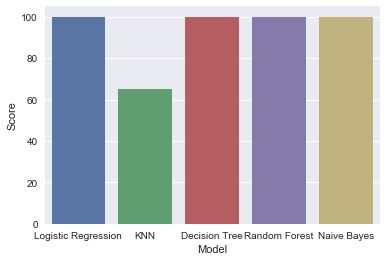

In [169]:
sns.barplot(x='Model',y='Score',data = models)